# Lecture \#9: Dynamic Time Warping

In [345]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

#x = np.array(np.random.normal(0,1,size=(1000,1))).reshape(-1, 1)
#y = np.array(np.random.normal(0,1,size=(1000,1))).reshape(-1, 1)
x = np.array([0, 0, 1, 1, 2, 4, 2, 1, 2, 0]).reshape(-1, 1)
y = np.array([0,0,0,0,0,0,0,1, 1, 1, 2, 2, 2, 2, 3, 2, 0]).reshape(-1, 1)

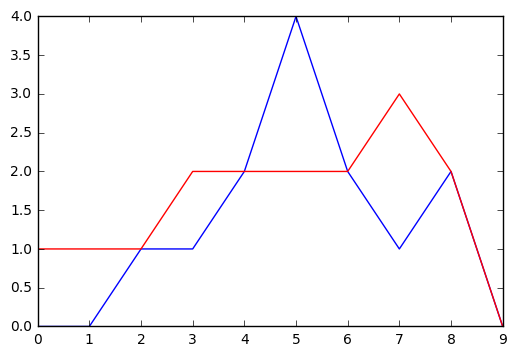

In [342]:
plt.plot(x,'b')
plt.plot(y,'r')
plt.show()

In [349]:
def dtw(x,y, d = lambda i,j: np.linalg.norm(i - j,ord=2)):
    M = len(x) # Number of elements in sequence x
    N = len(y) # Number of elements in sequence y
    C = np.zeros((M,N)) # The local cost matrix
    D = np.zeros((M,N)) # The accumulative cost matrix
    
    # First, let's fill out D (time complexity O(M*N)):
    for m in range(len(x)):
        for n in range(len(y)):
            if (m == 0 and n == 0):
                D[m][n] = C[m][n] = d(x[m],y[n])
            elif m == 0 and n > 0:
                C[m][n] = d(x[m],y[n])
                D[m][n] = C[m][n] + D[m][n-1]
            elif m > 0 and n == 0:
                C[m][n] = d(x[m],y[n])
                D[m][n] = C[m][n] + D[m-1][n]
            else:
                C[m][n] = d(x[m],y[n])
                D[m][n] = C[m][n] + np.min([D[m-1][n], D[m][n-1], D[m-1][n-1]]) 

    # Then, using D we can easily find the optimal path, starting from the end

    p = [(M-1, N-1)] # This will store the a list with the indexes of D for the optimal path
    m,n = p[-1] 

    while (m != 0 and n !=0):   
        options = [[D[max(m-1,0)][n], D[m][max(n-1,0)], D[max(m-1,0)][max(n-1,0)]],
                   [(max(m-1,0),n),(m,max(n-1,0)),(max(m-1,0),max(n-1,0))]]
        p.append(options[1][np.argmin(options[0])])
        m,n = p[-1]
    
    pstar = np.asarray(p[::-1])           
    optimal_cost = D[-1][-1]
    
    return optimal_cost, pstar, C, D

In [352]:
optimal_cost, pstar, local_cost, accumulative_cost = dtw(x,y)

In [351]:
print("The DTW distance is: {}".format(optimal_cost))
print("The optimal path is: \n{}".format(pstar))

The DTW distance is: 2.0
The optimal path is: 
[[ 0  6]
 [ 1  6]
 [ 2  7]
 [ 2  8]
 [ 2  9]
 [ 3  9]
 [ 4 10]
 [ 4 11]
 [ 4 12]
 [ 4 13]
 [ 5 14]
 [ 6 15]
 [ 7 15]
 [ 8 15]
 [ 9 16]]


Let's see what the path looks like on top of the accumulative cost matrix (and, because we can, let's also plot the local cost matrix):

In [353]:
def plotWarping(D,C,pstar):
    fig1 = plt.figure()
    plt.imshow(D.T,origin='lower',cmap='gray',interpolation='nearest')
    plt.colorbar()
    plt.title('Accumulative Cost Matrix')
    plt.plot(pstar[:,0], pstar[:,1],'w-')
    plt.show()

    fig2 = plt.figure()
    plt.imshow(C.T,origin='lower',cmap='gray',interpolation='nearest')
    plt.colorbar()
    plt.title('Local Cost Matrix')
    plt.show()

    return fig1, fig2

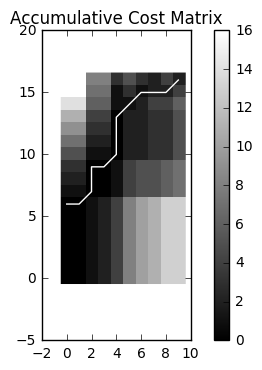

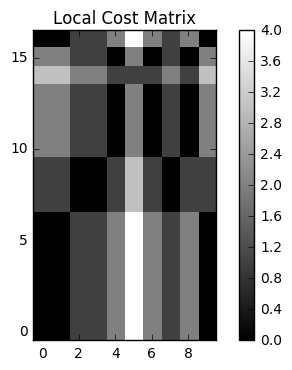

(<matplotlib.figure.Figure at 0x119926128>,
 <matplotlib.figure.Figure at 0x117c4f208>)

In [354]:
plotWarping(accumulative_cost,local_cost,pstar)

Now let's have a bit of fun with this new function.

In [271]:
import pickle

pkf = open('data/loadCurves.pkl','rb')
data,loadCurves = pickle.load(pkf)
pkf.close()

First, let's try comparing the first and last day of the dataset.

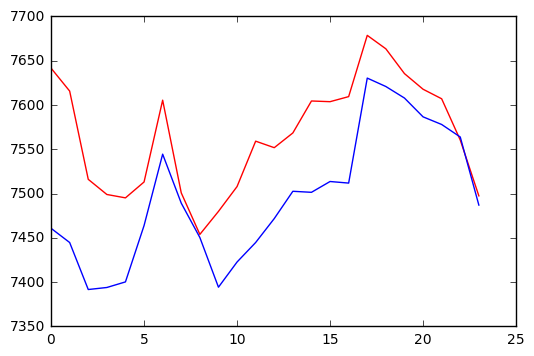

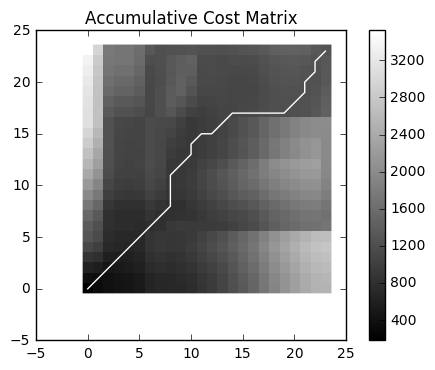

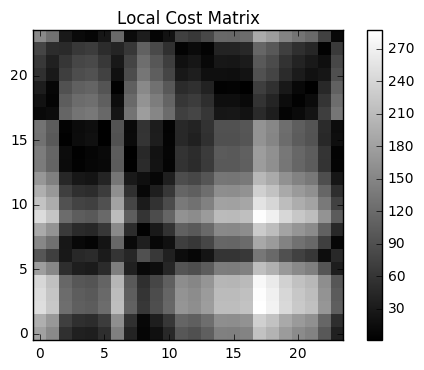

The DTW distance between them is: 1277.0742932291732


In [284]:
y = loadCurves.ix[1].values.reshape(-1,1)
x = loadCurves.ix[365].values.reshape(-1,1)

plt.plot(x,'r')
plt.plot(y,'b')
plt.show()

Dstar, Pstar, C, D = dtw(x,y)
plotWarping(D,C,Pstar)
print("The DTW distance between them is: {}".format(Dstar))

But why don't we just calculate that distance across all possible pairs?

In [289]:
#loadCurves = loadCurves.replace(np.inf,np.nan).fillna(0)

#dtwMatrix = np.zeros((365,365))
for i in range(1,31):
    for j in range(1,365):
        x = loadCurves.ix[i].values.reshape(-1,1)
        y = loadCurves.ix[j].values.reshape(-1,1)
        
        dtwMatrix[i][j],_,_,_ = dtw(x,y)

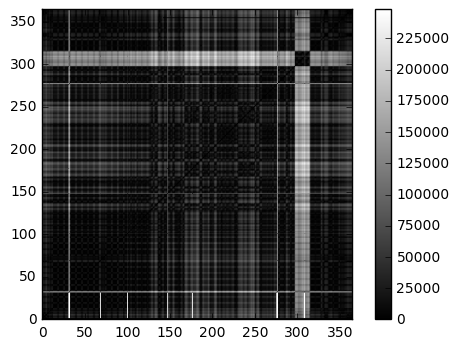

In [291]:
plt.imshow(dtwMatrix,origin='bottom',cmap='gray')
plt.colorbar()

In [292]:
dtwMatrix[10][30:33]

array([ 10848.92816482,             nan,             nan])